# Analysis of Data Related to European Football

## Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from xml.etree.ElementTree import fromstring, ElementTree
import xml.etree.ElementTree as ET

# Display Parameters

## Display Features

In [2]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Colors

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Players

In [162]:
players = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players3.csv",
    index_col=0,
)

In [67]:
players.head()

,PlayerID,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,Birthday,Height,Weight,BMI,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle,MeanofAttributes
0,2625,2007,right,high,medium,1981.0,175.26,154.0,22.74,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,48.5,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,56.43
1,2625,2008,right,high,medium,1981.0,175.26,154.0,22.74,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0,56.41
2,2625,2010,right,high,medium,1981.0,175.26,154.0,22.74,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0,57.86
3,2625,2011,right,high,medium,1981.0,175.26,154.0,22.74,58.5,60.5,52.0,47.0,46.0,58.0,37.0,56.0,49.0,50.0,66.0,58.0,66.0,63.0,58.0,49.0,61.5,68.0,55.0,77.0,55.0,58.0,71.0,65.0,49.0,55.0,66.0,63.0,63.0,57.0,56.78
4,2625,2012,right,medium,medium,1981.0,175.26,154.0,22.74,58.0,58.0,52.0,47.0,46.0,53.0,37.0,56.0,49.0,50.0,66.0,58.0,67.0,63.0,67.0,49.0,76.0,68.0,55.0,77.0,55.5,58.0,71.0,64.0,49.0,55.0,66.0,63.0,63.0,52.0,57.14


In [7]:
players.size

2864600

In [8]:
players.shape

(71615, 40)

In [9]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71615 entries, 0 to 71614
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PlayerID          71615 non-null  int64  
 1   Date              71615 non-null  int64  
 2   PreferredFoot     71615 non-null  object 
 3   AttackWorkRate    71615 non-null  object 
 4   DefenceWorkRate   71615 non-null  object 
 5   Birthday          71615 non-null  float64
 6   Height            71615 non-null  float64
 7   Weight            71615 non-null  float64
 8   BMI               71615 non-null  float64
 9   OverallRating     71615 non-null  float64
 10  Potential         71615 non-null  float64
 11  Crossing          71615 non-null  float64
 12  Finishing         71615 non-null  float64
 13  HeadingAccuracy   71615 non-null  float64
 14  ShortPassing      71615 non-null  float64
 15  Volleys           71615 non-null  float64
 16  Dribbling         71615 non-null  float6

In [10]:
round(players.describe(), 2)

,PlayerID,Date,Birthday,Height,Weight,BMI,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle,MeanofAttributes
count,71615.00,71615.0,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00,71615.00
mean,128408.91,2011.4,1986.35,182.00,169.03,23.12,67.26,72.78,53.31,48.11,56.18,60.59,47.76,56.86,50.84,47.65,55.59,61.40,66.68,67.11,64.82,64.80,64.72,59.64,66.39,65.92,66.64,51.15,59.86,51.90,54.30,57.13,53.97,46.24,49.43,47.33,56.76
std,134076.98,2.9,4.90,6.39,15.05,1.32,7.34,6.72,17.36,19.15,16.80,14.61,18.42,18.02,18.22,17.57,14.33,15.48,12.59,12.26,12.48,9.35,12.47,16.39,10.64,12.84,12.03,18.43,15.95,18.75,18.34,14.88,15.46,21.15,21.36,21.64,9.77
min,2625.00,2007.0,1969.00,157.48,117.00,17.87,33.00,39.00,2.00,2.00,3.00,3.00,1.00,1.00,4.00,1.00,4.00,7.00,13.00,12.00,15.00,20.00,12.00,2.00,14.00,14.00,17.00,1.00,9.00,1.00,4.00,1.00,3.00,1.00,2.00,2.00,18.05
25%,33881.00,2009.0,1983.00,177.80,159.00,22.20,63.00,68.00,43.00,32.00,48.00,55.00,33.00,48.00,38.50,35.00,47.00,56.00,60.00,61.00,57.83,59.00,58.00,51.00,60.00,59.67,59.50,38.00,50.00,36.00,43.00,48.00,44.00,25.00,28.00,25.00,52.67
50%,69803.00,2012.0,1987.00,182.88,168.00,23.10,67.00,73.00,57.00,50.00,59.00,63.50,50.00,61.00,53.00,48.00,58.00,65.00,68.00,68.67,66.00,65.25,66.00,63.00,67.00,68.00,68.00,55.00,63.00,56.00,58.00,59.00,55.50,50.00,55.00,52.50,58.24
75%,182075.00,2014.0,1990.00,185.42,179.00,23.98,72.00,77.25,66.00,64.00,68.00,70.00,62.00,70.00,65.00,61.00,66.00,71.83,75.00,75.33,73.50,71.00,73.00,71.50,73.00,74.50,75.00,65.00,72.00,67.00,68.00,68.00,65.00,65.00,68.00,66.00,63.16
max,750584.00,2016.0,1999.00,208.28,243.00,30.86,94.00,97.00,95.00,97.00,96.00,97.00,93.00,97.00,94.00,96.00,97.00,97.00,97.00,97.00,96.00,96.00,96.00,96.50,96.00,96.00,96.00,96.00,97.00,96.00,95.00,97.00,96.00,94.00,95.00,95.00,82.30


In [11]:
players.sample(15)

,PlayerID,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,Birthday,Height,Weight,BMI,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle,MeanofAttributes
21316,37294,2009,right,medium,medium,1979.0,172.72,159.0,24.17,65.00,69.00,63.00,39.0,44.0,69.0,23.0,66.00,55.00,33.0,64.00,67.00,66.0,67.00,67.00,63.00,72.0,62.0,66.00,67.00,72.00,48.0,68.0,69.0,67.0,69.00,71.0,64.0,64.00,63.0,60.20
43506,114737,2009,right,medium,medium,1987.0,193.04,185.0,22.51,64.00,74.00,22.00,22.0,22.0,28.0,8.0,22.00,9.00,16.0,58.00,32.00,41.0,48.00,60.00,61.00,63.0,37.0,67.00,49.00,46.00,22.0,24.0,41.0,27.0,43.00,38.0,22.0,22.00,8.0,36.08
10732,27415,2008,right,medium,medium,1979.0,190.50,192.0,23.99,68.00,74.00,32.00,22.0,73.0,54.0,37.0,23.00,31.00,20.0,49.00,40.00,41.0,42.00,46.00,65.00,83.0,40.0,74.00,63.00,76.00,46.0,66.0,70.0,64.0,61.00,63.0,72.0,75.00,71.0,53.71
40430,98368,2014,right,medium,medium,1983.0,187.96,187.0,24.01,67.75,67.75,34.75,23.0,70.0,60.0,25.0,43.25,36.75,51.0,56.75,54.25,38.0,45.25,42.25,65.75,35.5,59.0,57.75,62.75,84.25,39.0,71.0,71.0,29.5,48.25,58.0,66.0,66.75,63.5,52.19
64779,303998,2007,left,medium,medium,1993.0,182.88,172.0,23.32,61.00,74.00,44.00,40.0,56.0,58.0,42.0,33.00,41.00,45.0,62.00,62.00,64.0,64.00,65.00,56.00,63.0,65.0,61.00,44.00,69.00,62.0,61.0,57.0,34.0,51.00,67.0,64.0,60.00,60.0,55.11
64343,299374,2014,left,high,medium,1989.0,170.18,139.0,21.77,66.20,68.20,59.60,53.6,39.6,59.6,44.6,71.60,39.60,30.6,49.60,69.60,86.6,84.00,85.80,60.80,87.0,51.6,45.00,80.20,33.00,38.6,44.2,22.6,60.8,59.20,51.6,23.6,26.60,28.6,53.03
11314,27659,2008,right,medium,medium,1987.0,193.04,176.0,21.42,60.00,78.00,22.00,22.0,22.0,23.0,12.0,22.00,11.00,21.0,62.00,35.00,51.0,61.00,52.00,58.00,50.0,36.0,73.00,66.00,63.00,22.0,34.0,56.0,54.0,23.00,38.0,22.0,22.00,16.0,38.98
46936,149962,2010,right,medium,medium,1990.0,180.34,170.0,23.71,73.00,81.00,60.00,25.0,65.0,69.0,15.0,59.50,26.00,27.0,62.00,64.00,70.0,71.50,64.00,70.00,74.0,57.0,74.00,72.00,75.00,50.0,78.0,68.0,60.0,69.00,54.0,75.5,77.00,73.0,60.72
6666,25347,2009,right,medium,medium,1982.0,177.80,157.0,22.52,73.00,75.00,70.00,77.0,62.5,72.0,62.0,68.00,73.00,69.0,70.00,73.00,68.0,69.00,67.00,60.00,72.0,72.0,62.00,65.00,71.50,71.0,58.0,52.5,70.0,71.00,61.0,21.0,33.00,39.0,62.90
6310,24800,2010,right,high,medium,1980.0,177.80,154.0,22.09,79.50,83.00,79.00,78.0,61.0,83.0,69.0,84.00,71.00,71.0,73.00,83.50,78.0,76.50,78.00,81.50,71.0,73.0,58.00,76.00,49.50,73.5,48.0,60.0,80.5,84.00,74.0,37.5,48.00,41.0,68.55


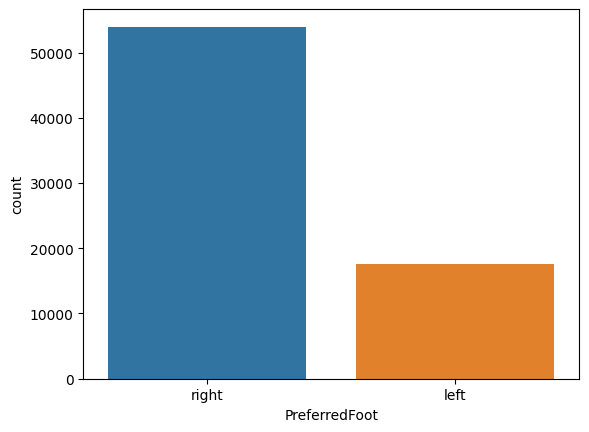

In [14]:
sns.countplot(x=players['PreferredFoot']);

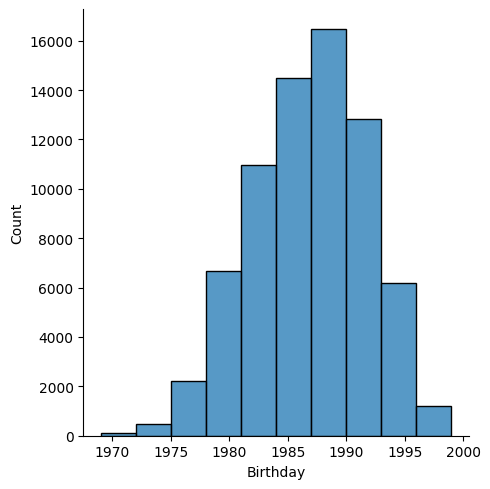

In [89]:
sns.displot(data=players, x="Birthday", bins = 10)

In [72]:
players['AttackWorkRate'].value_counts()

medium    50394
high      14719
low        3570
None       1853
[]          674
norm        227
y            61
stoc         60
le           57
Name: AttackWorkRate, dtype: int64

In [165]:
players['AttackWorkRate'].value_counts()
allowed_values = ['high', 'medium', 'low']

players.loc[~players["AttackWorkRate"].isin(allowed_values), "AttackWorkRate"] = np.nan
players['AttackWorkRate'].value_counts()

medium    50394
high      14719
low        3570
Name: AttackWorkRate, dtype: int64

In [166]:
players['AttackWorkRate'].value_counts()

medium    50394
high      14719
low        3570
Name: AttackWorkRate, dtype: int64

<AxesSubplot: xlabel='AttackWorkRate', ylabel='count'>

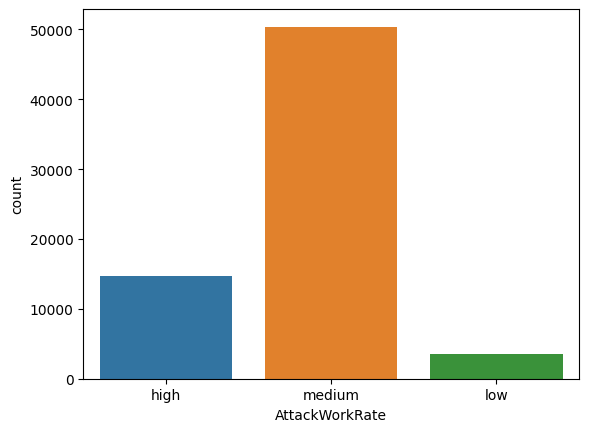

In [167]:
sns.countplot(data=players, x = 'AttackWorkRate')

In [157]:
players['DefenceWorkRate'].value_counts()
allowed_values = ['high', 'medium', 'low']

In [158]:
players.loc[~players["DefenceWorkRate"].isin(allowed_values), "DefenceWorkRate"] = np.nan
players['DefenceWorkRate'].value_counts()

medium    51851
high       9721
low        7048
Name: DefenceWorkRate, dtype: int64

<AxesSubplot: xlabel='DefenceWorkRate', ylabel='count'>

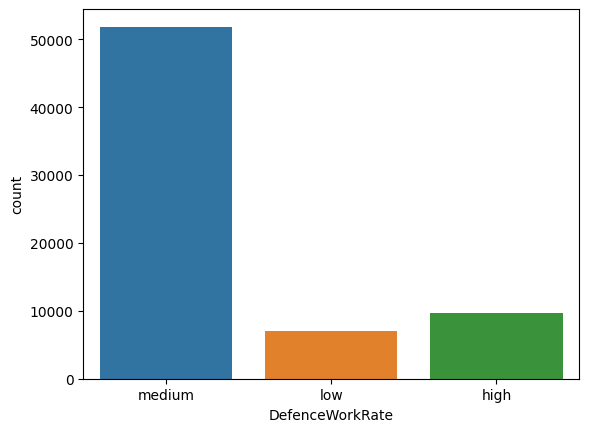

In [159]:
sns.countplot(data=players,x='DefenceWorkRate')

<AxesSubplot: xlabel='PreferredFoot', ylabel='OverallRating'>

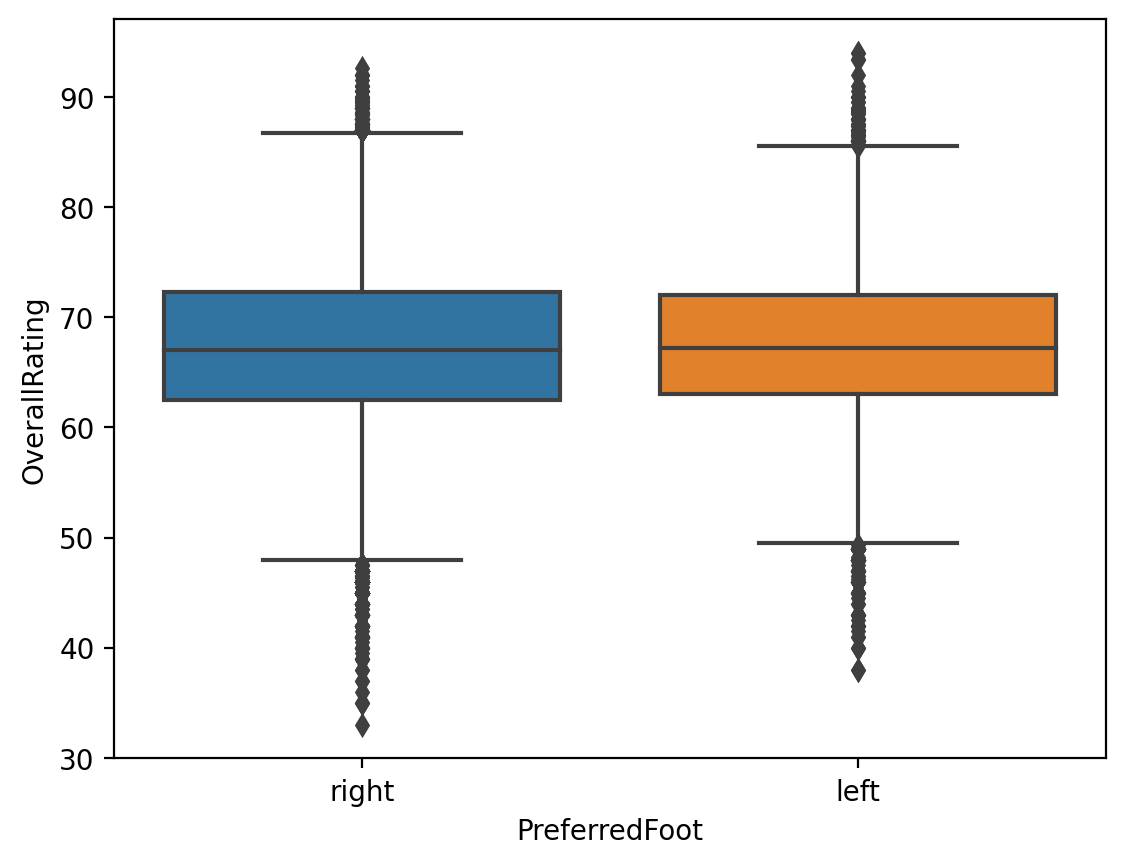

In [77]:
plt.figure(dpi = 200)
sns.boxplot(x='PreferredFoot',y='OverallRating',data=players)

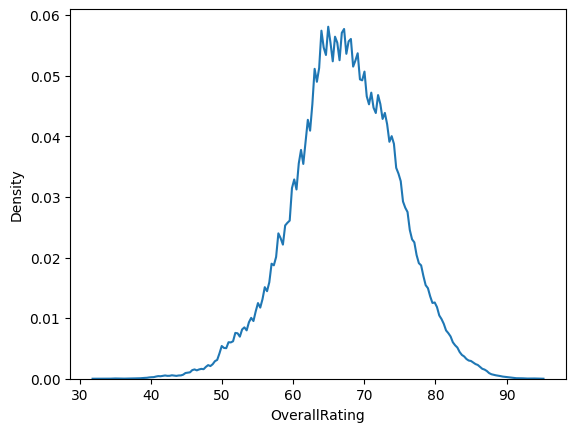

In [104]:
sns.kdeplot(x=players['OverallRating'], bw_adjust = 0.5);

<AxesSubplot: ylabel='Density'>

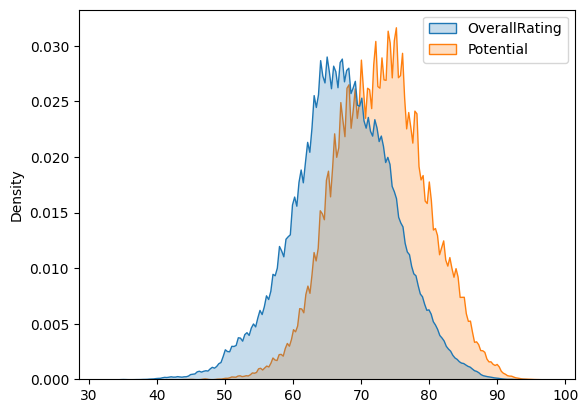

In [103]:
sns.kdeplot(data=players[["OverallRating", "Potential"]], shade=True,legend=True, bw_adjust = 0.5)

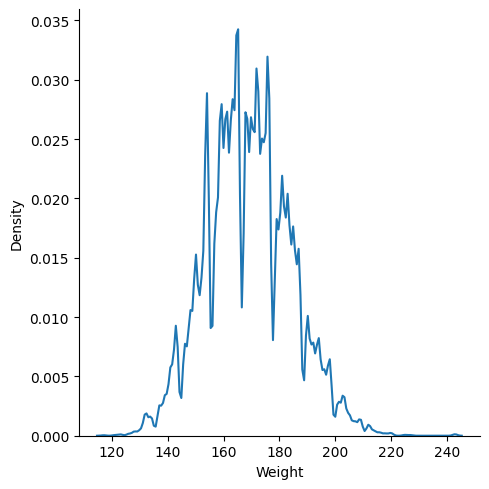

In [102]:
sns.displot(players, x="Weight",kind="kde", bw_adjust = 0.5)

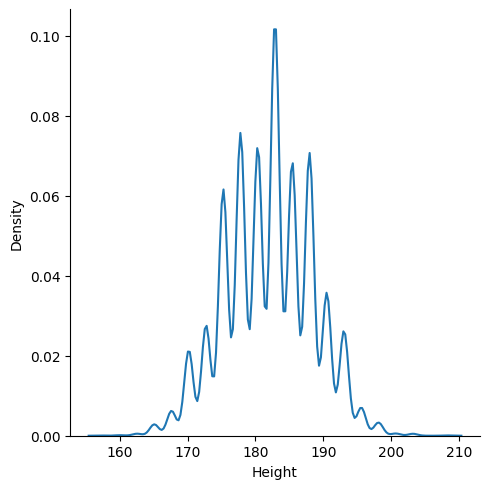

In [99]:
sns.displot(players, x="Height",kind="kde")

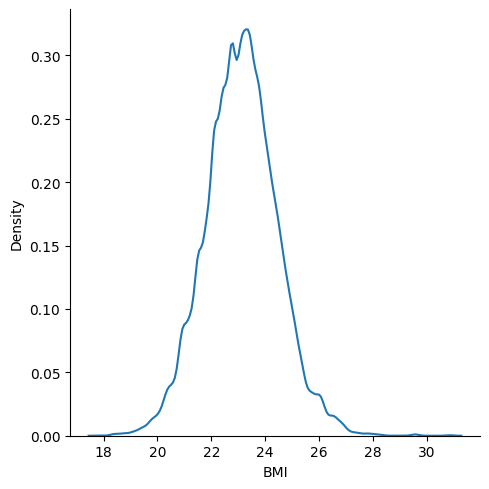

In [93]:
sns.displot(players, x='BMI',kind='kde');

<AxesSubplot: xlabel='Height', ylabel='Weight'>

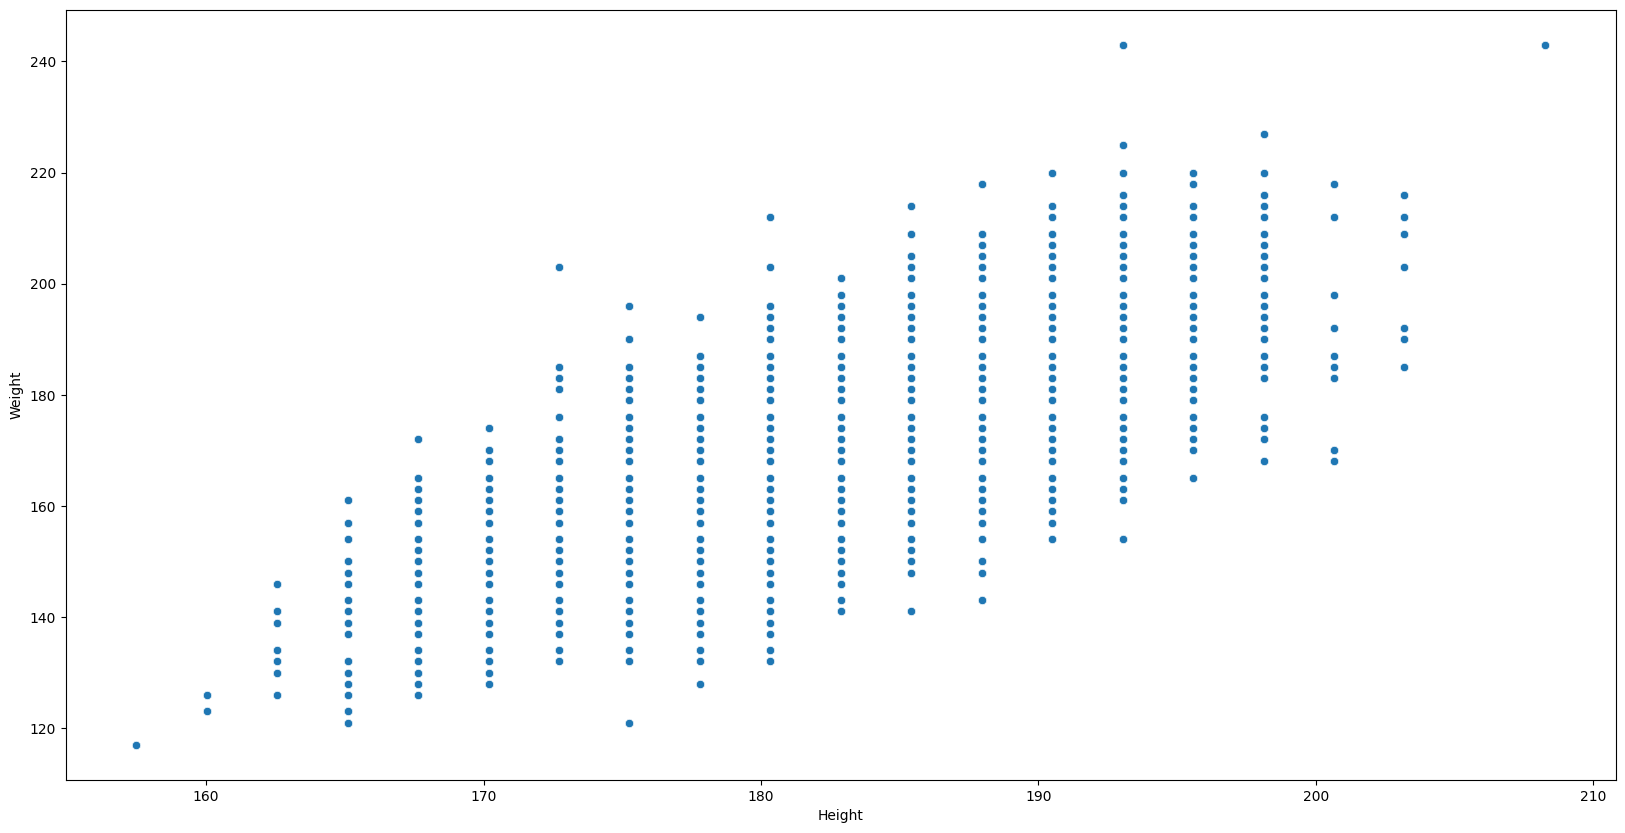

In [97]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=players, x="Height", y="Weight")

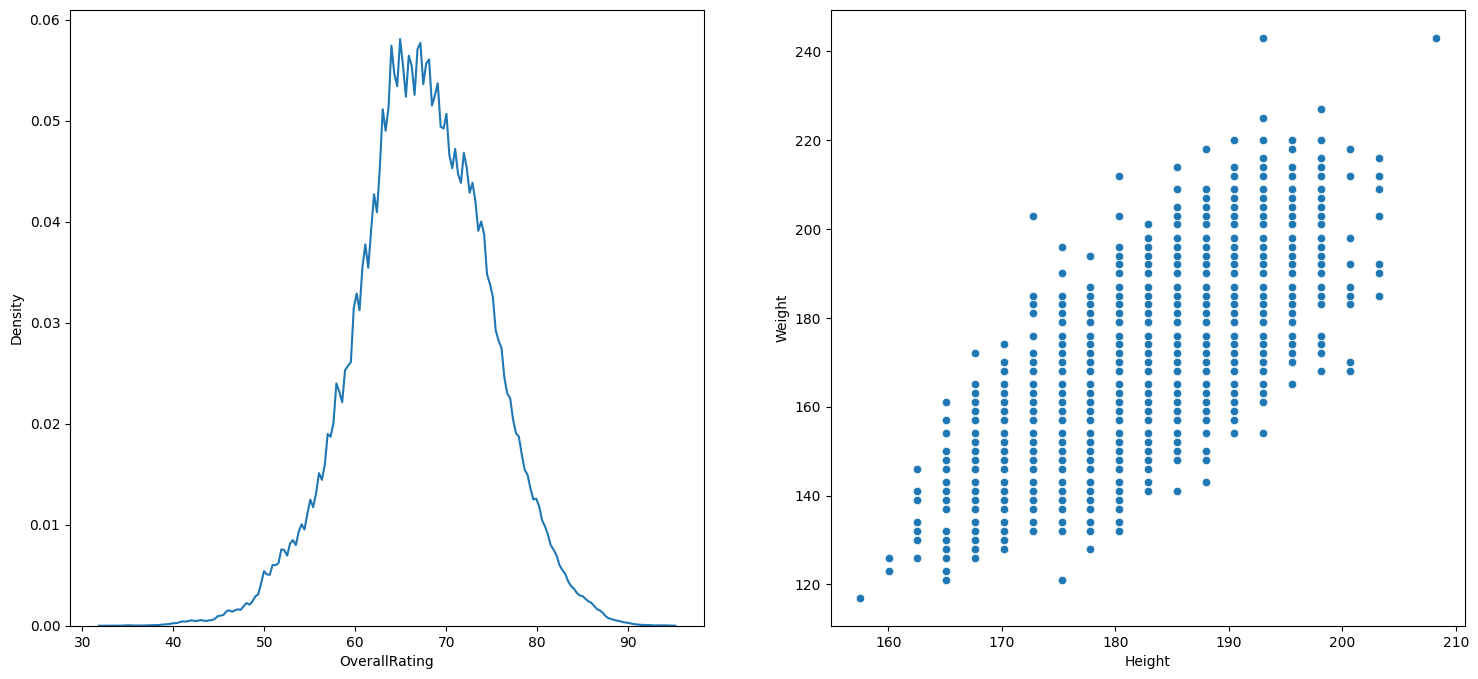

In [179]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))


# # Plot 1
# g1 = sns.histplot(data=df_bklyn, x='distance', ax=axes[0])



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

sns.kdeplot(x=players['OverallRating'], bw_adjust = 0.5, ax=axes[0])
sns.scatterplot(data=players, x="Height", y="Weight", ax=axes[1])

plt.show()